# Soheib Abdelkader CHARIF 
# Sifax ZIANI

# PARTIE 1 : Préparation des Données 

1.1 Importation des bibliothèques nécessaires

In [1]:
import numpy as np

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

1.2 Chargement des jeux de données

In [4]:
iris = datasets.load_iris()

In [6]:
wine = datasets.load_wine()

In [7]:
wholesale = pd.read_csv('../data/Wholesale customers data.csv')


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
#Transformation des bunch en DataFrame
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)


### IRIS

In [10]:
iris_df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
print("Features : ",iris_df.columns)

Features :  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [11]:
print("Dimension du Dataset iris : " , iris_df.shape)
print("\nType de données du Dataset iris :\n", iris_df.dtypes)
print("\nLes caractéristiques  sont :\n", iris_df.columns)
print(" Les Données manquantes pour chaque colonnes :\n", iris_df.isna().sum()) 
#Pas de Valeur manquantes

print('Description statique : ')
iris_df.describe()


Dimension du Dataset iris :  (150, 4)

Type de données du Dataset iris :
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Les caractéristiques  sont :
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
 Les Données manquantes pour chaque colonnes :
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Description statique : 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


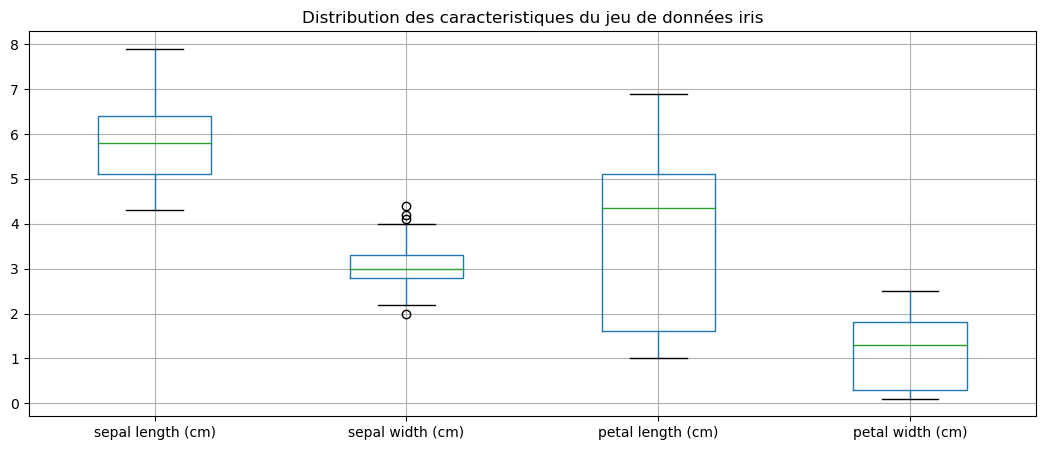

In [12]:
# Description de caractériques
iris_df.boxplot(figsize=(13,5))
plt.title("Distribution des caracteristiques du jeu de données iris")
plt.show()
      

In [13]:
# Mise à l'echelle StandardScaler
scaler1 = StandardScaler()
iris_standardisee = scaler1.fit_transform(iris_df)
# Réaffichage de la destribution statistque
iris_standardisee_df = pd.DataFrame(iris_standardisee)
iris_standardisee_df.describe()

# Normalisation MinMax
##scaler = MinMaxScaler()
##iris_normalisee = scaler.fit_transform(iris_df)
##iris_normalisee_df = pd.DataFrame(iris_normalisee)
##iris_normalisee_df.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


### WINE

In [14]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [68]:
print("Features : ",wine_df.columns)

Features :  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [66]:
print("Dimension du Dataset wine : " , wine_df.shape)
print("\n\n Type de données du Dataset wine :\n", wine_df.dtypes)
print("\n\nLes Données manquantes pour chaque colonnes :\n", wine_df.isna().sum()) 
#Pas de valeurs manquantes
print("\n\nDescription statistique:\n")
wine_df.describe()

Dimension du Dataset wine :  (178, 13)


 Type de données du Dataset wine :
 alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


Les Données manquantes pour chaque colonnes :
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


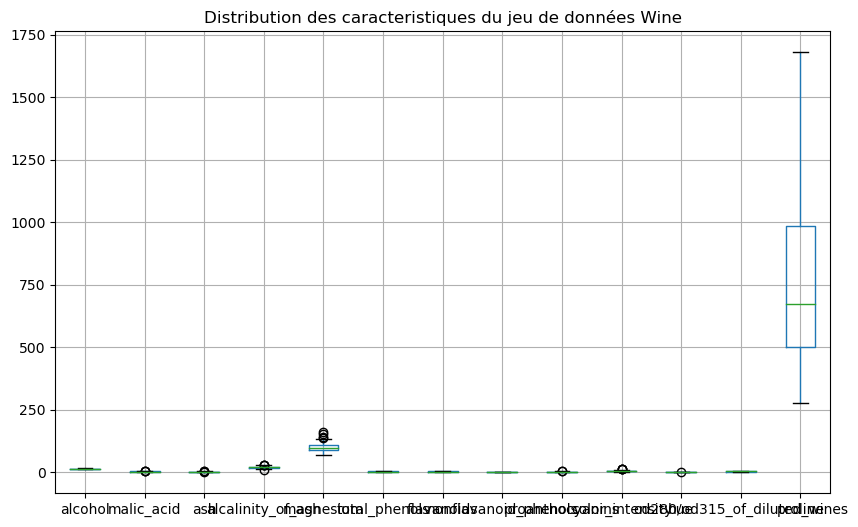

In [16]:
wine_df.boxplot(figsize=(10,6))
plt.title("Distribution des caracteristiques du jeu de données Wine")
plt.show()
      

In [17]:
# Mise à l'echelle StandardScaler
wine_standardisee = scaler1.fit_transform(wine_df)
# Réaffichage de la destribution statistque
wine_standardisee_df = pd.DataFrame(wine_standardisee)
wine_standardisee_df.describe()

# Normalisation MinMax


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### WHOLESALE

In [18]:
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [67]:
print("Features : ",wholesale.columns)

Features :  Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [19]:
print("Dimension du Dataset wholesale : " , wholesale.shape)
print("\n\nType de données du Dataset wholesale :\n", wholesale.dtypes)
print("\n\nLes Données manquantes pour chaque colonnes :\n", wholesale.isna().sum()) 
#Pas de valeurs manquantes


print("\n\nDescription statistique:\n")
iris_df.describe()


Dimension du Dataset wholesale :  (440, 8)


Type de données du Dataset wholesale :
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


Les Données manquantes pour chaque colonnes :
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Description statistique:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


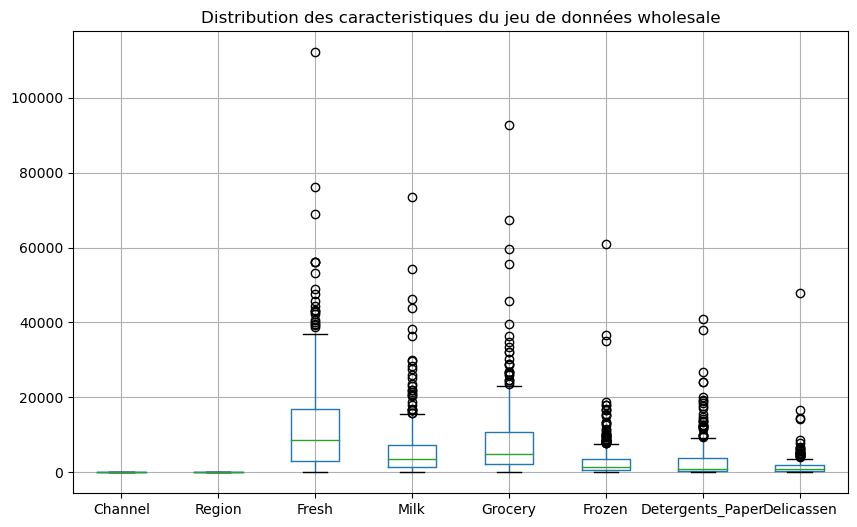

In [20]:
wholesale.boxplot(figsize=(10,6))
plt.title("Distribution des caracteristiques du jeu de données wholesale")
plt.show()
      

In [21]:
# Mise à l'echelle StandardScaler
wholesale_standardisee = scaler1.fit_transform(wholesale)
# Réaffichage de la destribution statistque
wholesale_standardisee_df = pd.DataFrame(wholesale_standardisee)
wholesale_standardisee_df.describe()

# Normalisation MinMax


,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


# PARTIE 2 : Clustering Kmeans 

## Kmeans IRIS 

In [23]:
# Préparation des données
X_iris = iris.data # 
y_iris = iris.target # 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

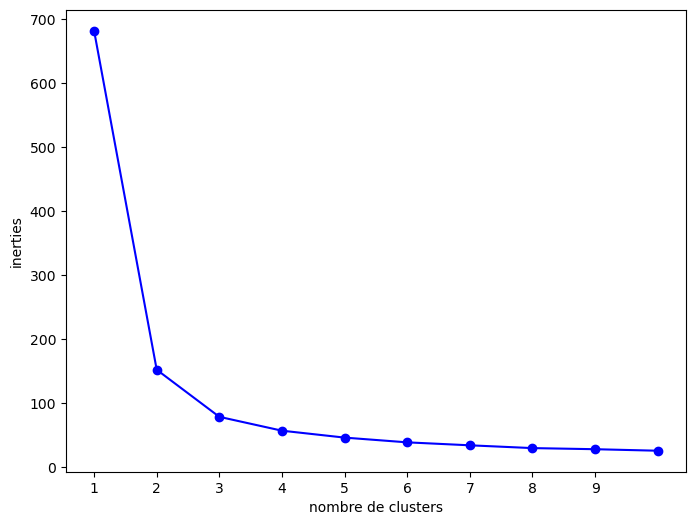

In [24]:
# Recherche du nombre de clusters appropriés avec la méthode du coude

inerties = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_iris)
    inerties.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inerties, 'b-',marker="o")
plt.xlabel('nombre de clusters')
plt.ylabel('inerties')
plt.xticks(range(1,len(K)))

plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_iris)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [26]:
print('Centre des points : ', kmeans.cluster_centers_)

Centre des points :  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [27]:
X_iris.shape, y_iris.shape

((150, 4), (150,))

In [28]:
labels = kmeans.labels_
print('Labels prédits : \n', labels)

Labels prédits : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


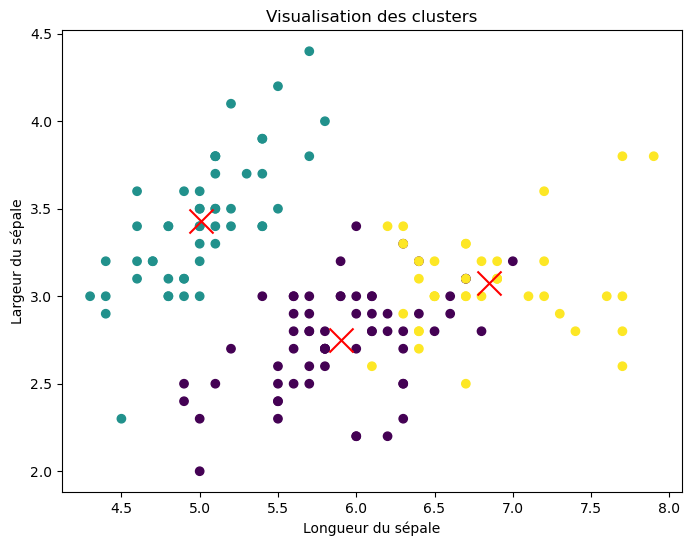

In [29]:
# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_iris[:,0], X_iris[:,1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='red', marker='x')
plt.xlabel('Longueur du sépale')
plt.ylabel('Largeur du sépale')
plt.title('Visualisation des clusters')

plt.show()

## Kmeans WINE 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

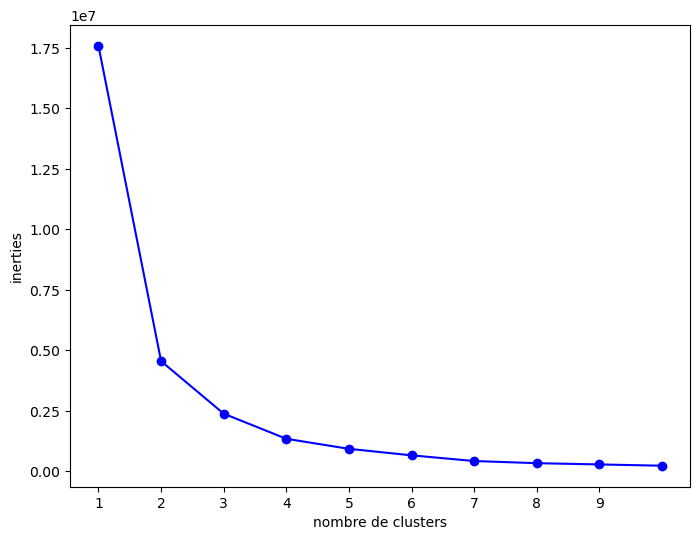

In [30]:
# Préparation des données
X_wine = wine.data # 
y_wine = wine.target 
# Recherche du nombre de clusters appropriés avec la méthode du coude

inerties = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_wine)
    inerties.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inerties, 'b-',marker="o")
plt.xlabel('nombre de clusters')
plt.ylabel('inerties')
plt.xticks(range(1,len(K)))

plt.show()

In [52]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_wine)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [53]:
labels = kmeans.labels_
print('Labels prédits : \n', labels)

Labels prédits : 
 [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


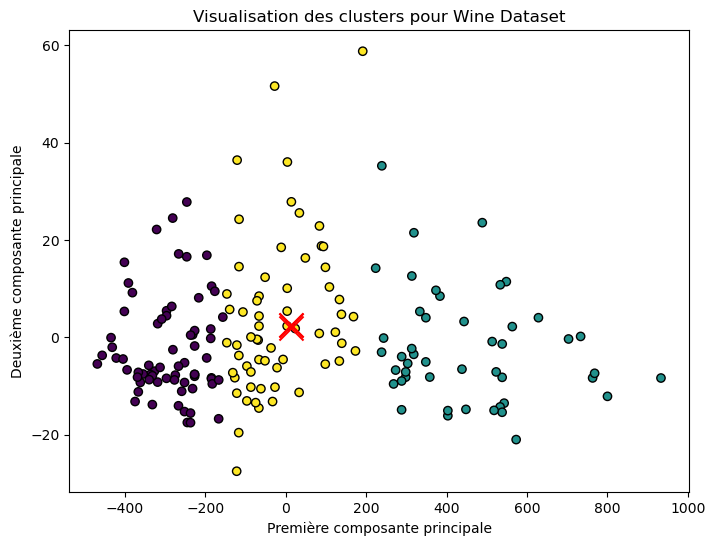

In [55]:
# Réduction de dimension avec PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_wine)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation des clusters pour Wine Dataset')
plt.show()

Kmeans Wholesale

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

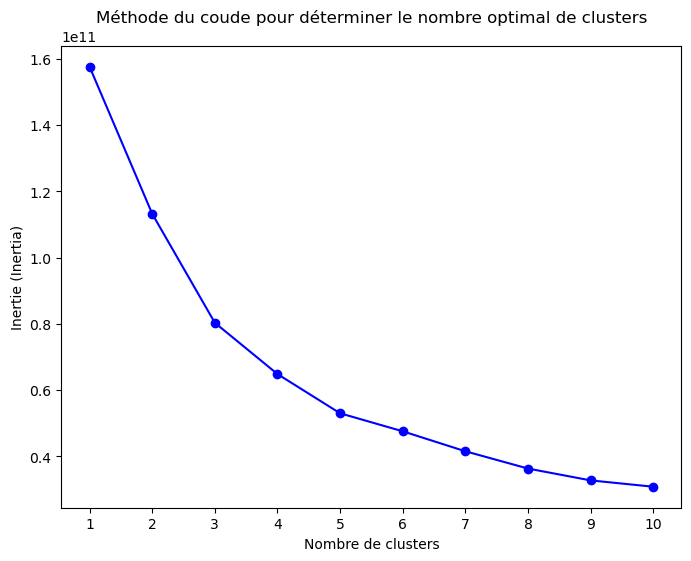

In [37]:
from sklearn.decomposition import PCA
# Préparation des données
# Retirer les colonnes catégorielles (par exemple 'Channel' et 'Region')
X_wholesale = wholesale.iloc[:, 2:]  # Garde les colonnes pertinentes pour le clustering
# Recherche du nombre de clusters appropriés avec la méthode du coude
inerties = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_wholesale)
    inerties.append(kmeans.inertia_)
    
# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(K, inerties, 'b-', marker="o")
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (Inertia)')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xticks(K)
plt.show()



In [38]:
# Appliquer KMeans avec le nombre de clusters choisi (par exemple, 5)
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_wholesale)
labels = kmeans.labels_
# Récupérer les centres des clusters
centers = kmeans.cluster_centers_
print('Labels prédits : \n', labels)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Labels prédits : 
 [0 0 0 0 1 0 0 0 0 3 3 0 1 1 1 0 3 0 1 0 1 0 1 3 1 1 0 0 3 2 1 0 1 1 0 0 1
 3 3 2 1 1 3 3 0 3 3 4 0 3 0 0 2 3 1 0 3 3 0 0 0 4 0 3 0 4 0 1 0 0 1 1 0 1
 0 1 0 3 0 0 0 3 0 1 0 4 4 2 0 1 0 0 3 1 3 0 0 0 0 0 3 3 0 2 0 1 3 3 0 3 0
 3 1 1 1 0 0 0 1 0 1 0 0 0 1 2 1 1 0 2 0 0 1 0 0 0 0 0 0 0 1 1 2 0 1 3 0 0
 0 1 1 0 1 0 0 3 3 1 0 3 0 0 1 3 0 3 0 0 0 0 3 3 0 3 0 3 2 0 0 0 0 2 3 2 0
 0 0 0 3 3 1 0 0 3 0 1 1 0 0 0 3 3 1 0 0 3 0 0 0 3 1 4 0 0 3 3 3 1 3 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 2 1 1 1 0 0 3 0 0 1 0 0 3 0 1 0 1 0 0 2
 2 0 0 1 0 3 3 3 1 3 1 0 0 0 1 0 0 1 0 0 1 0 0 2 1 2 2 0 1 1 2 0 0 0 3 1 0
 1 0 0 0 1 3 0 3 3 3 3 1 0 3 0 1 3 0 0 3 0 0 0 3 0 0 1 0 1 2 0 0 1 0 0 3 1
 4 1 1 0 0 0 0 0 0 0 3 0 0 3 1 0 3 0 3 0 3 1 0 1 3 0 0 1 0 0 0 0 0 0 0 1 0
 2 1 0 1 0 0 3 2 0 0 1 1 1 0 3 0 0 1 0 0 0 0 0 1 0 0 3 0 0 0 0 1 1 1 1 0 1
 3 0 0 0 0 0 0 0 0 3 0 3 0 3 1 1 1 1 0 3 1 0 0 3 0 1 0 1 1 2 3 0 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


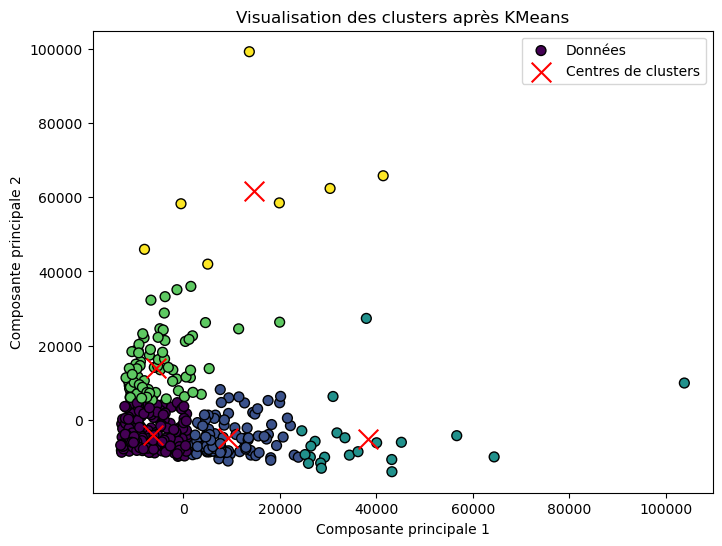

In [39]:
# Réduction de dimensionnalité avec PCA pour la visualisation
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour visualisation
X_reduced = pca.fit_transform(X_wholesale)
# Réduction des centres de clusters pour la visualisation avec PCA
centers_reduced = pca.transform(centers)
# Visualisation des clusters et des centres de clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, label='Données')
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', marker='x', s=200, label='Centres de clusters')  # Tracer les centres des clusters
plt.title('Visualisation des clusters après KMeans')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()

# PARTIE 3 : Clustering Hiérarchique

## 3.1 IRIS

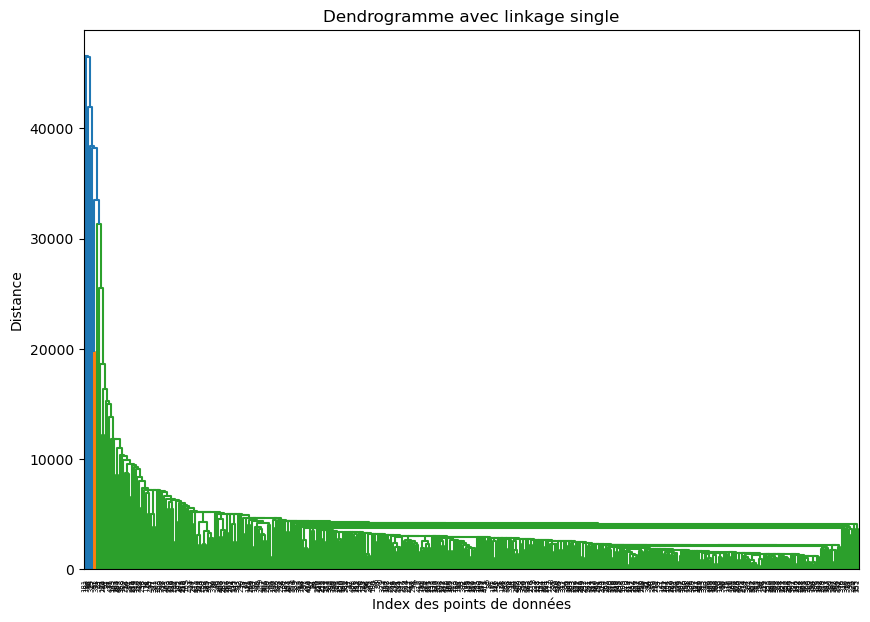

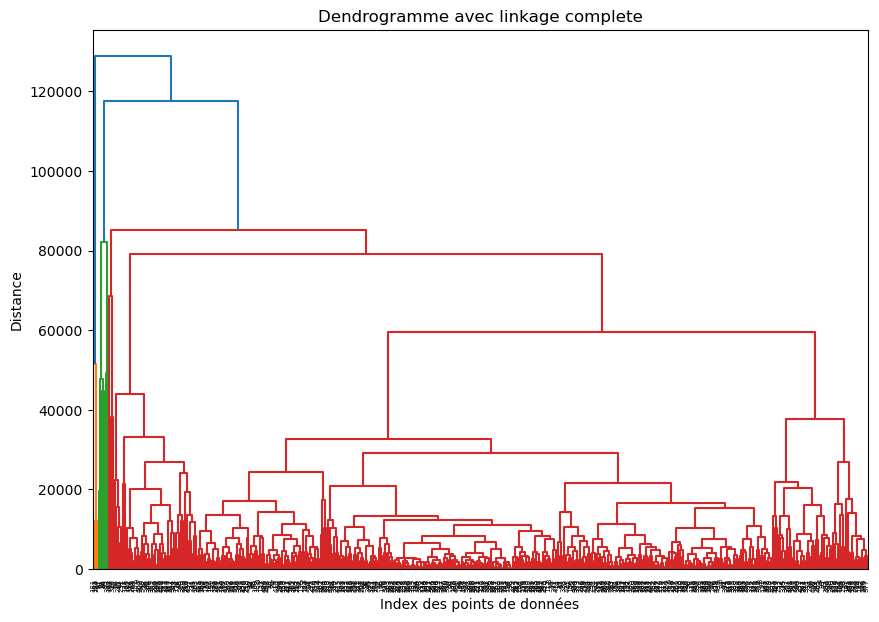

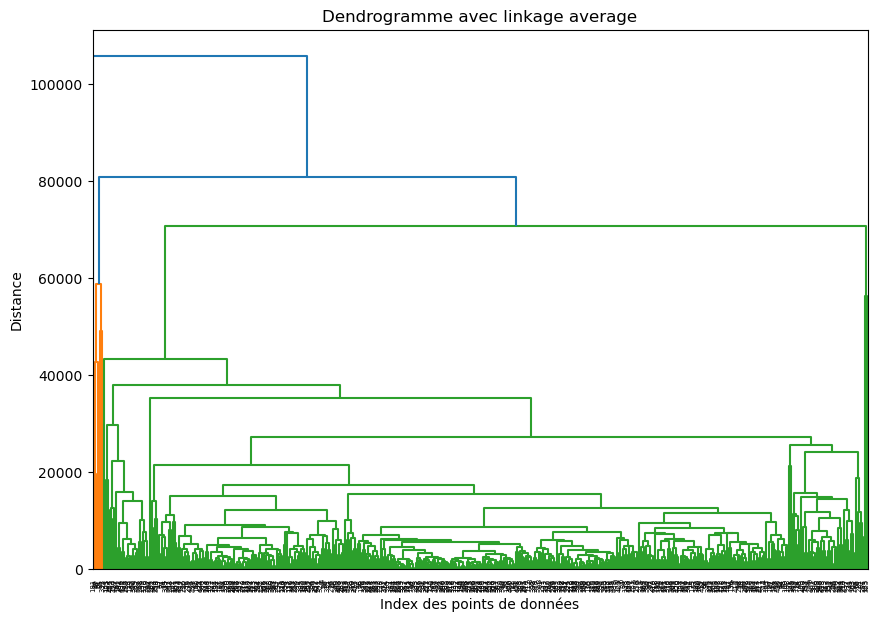

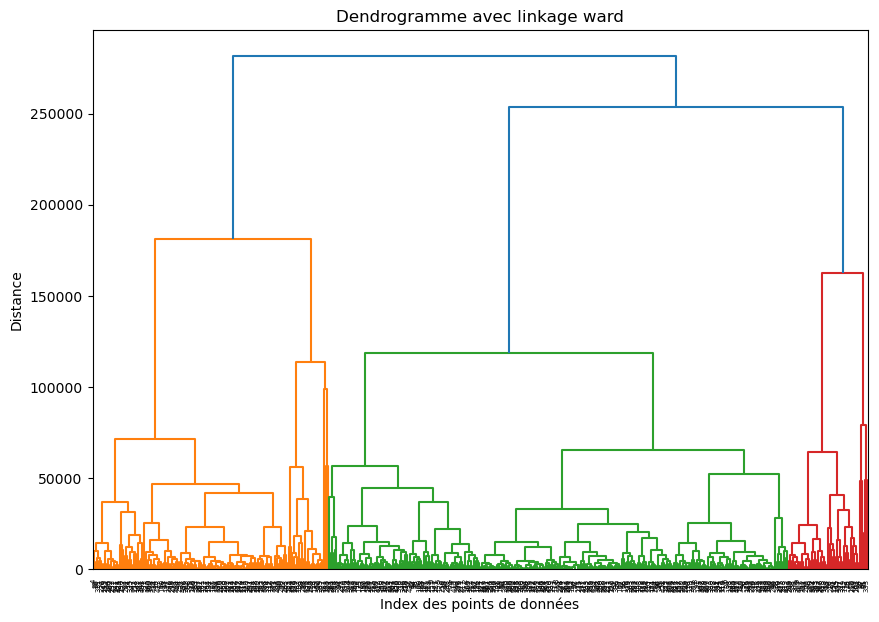

In [41]:
# Test de différents types de linkage
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    Z = linkage(X_wholesale, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f"Dendrogramme avec linkage {method}")
    plt.xlabel("Index des points de données")
    plt.ylabel("Distance")
    plt.show()


## 3.2 WINE

In [42]:
# Function to perform and plot hierarchical clustering
def hierarchical_clustering(X, title, linkage_method):
    # Perform hierarchical clustering
    Z = linkage(X, method=linkage_method)
    
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f"Dendrogram for {title} - {linkage_method} linkage")
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    return Z

# Function to apply and analyze clustering
def analyze_clustering(data, dataset_name):
    # Standardizing the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    
    # Exploring different linkage methods
    linkages = ['single', 'complete', 'average', 'ward']
    for linkage_method in linkages:
        Z = hierarchical_clustering(X_scaled, dataset_name, linkage_method)
        # Determine the number of clusters from the dendrogram
        max_d = 7.0  # Example cutoff distance, you can adjust this
        clusters = fcluster(Z, max_d, criterion='distance')
        print(f"Number of clusters for {linkage_method} linkage in {dataset_name}: {len(np.unique(clusters))}")
        
        


In [62]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to perform and plot hierarchical clustering with optional threshold visualization
def hierarchical_clustering(X, title, linkage_method, max_d=None):
    # Perform hierarchical clustering
    Z = linkage(X, method=linkage_method)
    
    # Plotting the dendrogram
    plt.figure(figsize=(8, 5))
    dendrogram(Z)
    plt.title(f"Dendrogram for {title} - {linkage_method} linkage")
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    
    # If a maximum distance is provided, plot a horizontal line at that distance
    if max_d is not None:
        plt.axhline(y=max_d, color='r', linestyle='--')
    
    plt.show()
    return Z

# Function to apply and analyze clustering
def analyze_clustering(data, dataset_name, max_d=50000):  # Adjusted default cutoff distance
    # Standardizing the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    
    # Exploring different linkage methods
    linkages = ['single', 'complete', 'average', 'ward']
    for linkage_method in linkages:
        print(f"Analyzing {linkage_method} linkage for {dataset_name}")
        Z = hierarchical_clustering(X_scaled, dataset_name, linkage_method, max_d)
        
        # Determine the number of clusters from the dendrogram at the given cutoff distance
        clusters = fcluster(Z, max_d, criterion='distance')
        print(f"Number of clusters at distance {max_d} for {linkage_method} linkage in {dataset_name}: {len(np.unique(clusters))}")


Analyzing single linkage for Iris


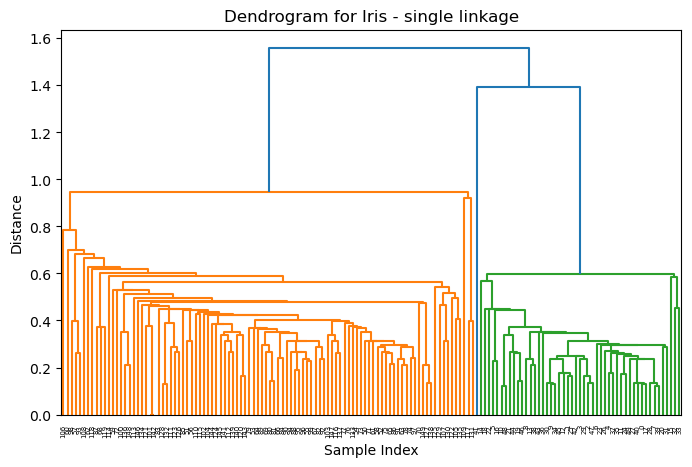

Number of clusters at distance 50000 for single linkage in Iris: 1
Analyzing complete linkage for Iris


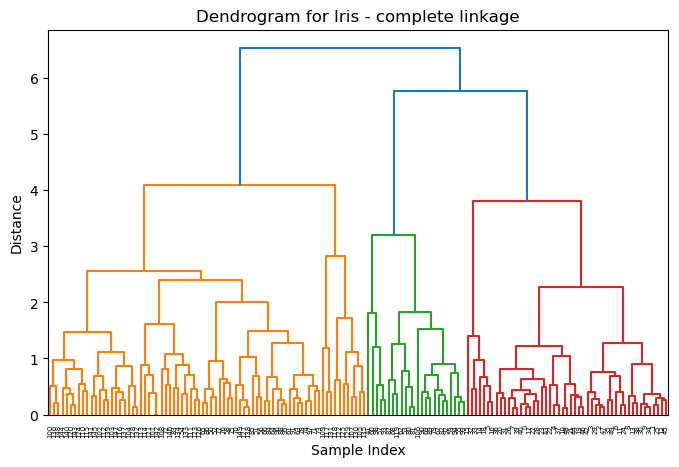

Number of clusters at distance 50000 for complete linkage in Iris: 1
Analyzing average linkage for Iris


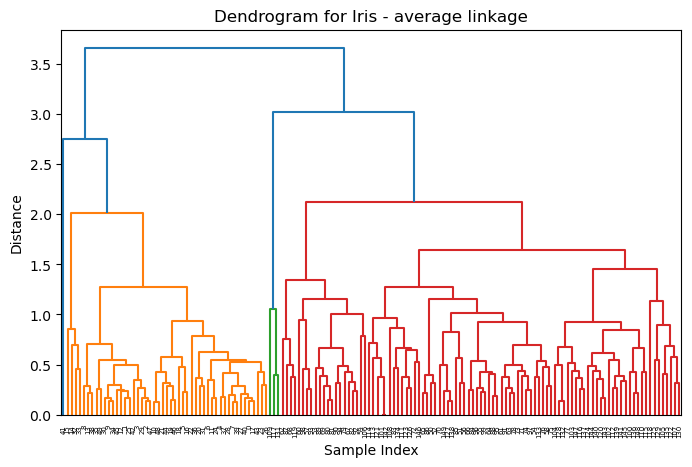

Number of clusters at distance 50000 for average linkage in Iris: 1
Analyzing ward linkage for Iris


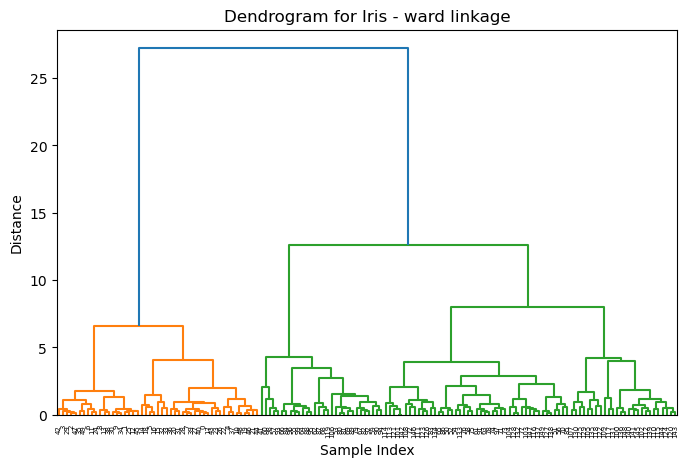

Number of clusters at distance 50000 for ward linkage in Iris: 1


In [63]:

# Iris dataset
analyze_clustering(X_iris, "Iris")

Analyzing single linkage for Wine


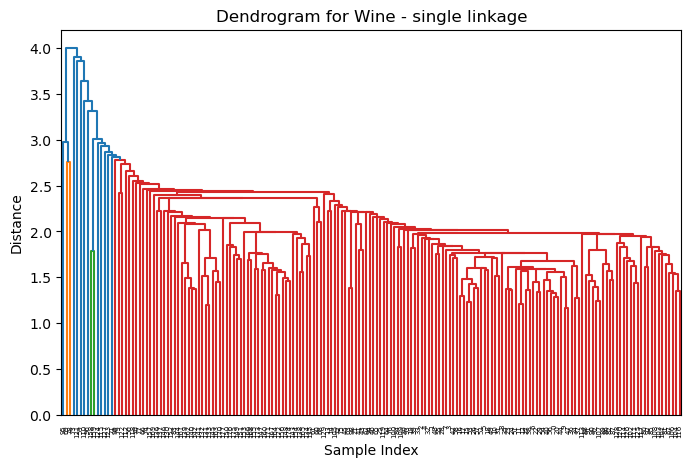

Number of clusters at distance 50000 for single linkage in Wine: 1
Analyzing complete linkage for Wine


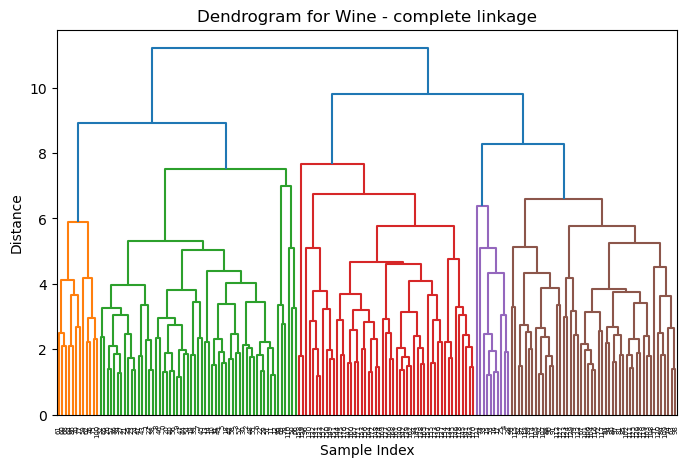

Number of clusters at distance 50000 for complete linkage in Wine: 1
Analyzing average linkage for Wine


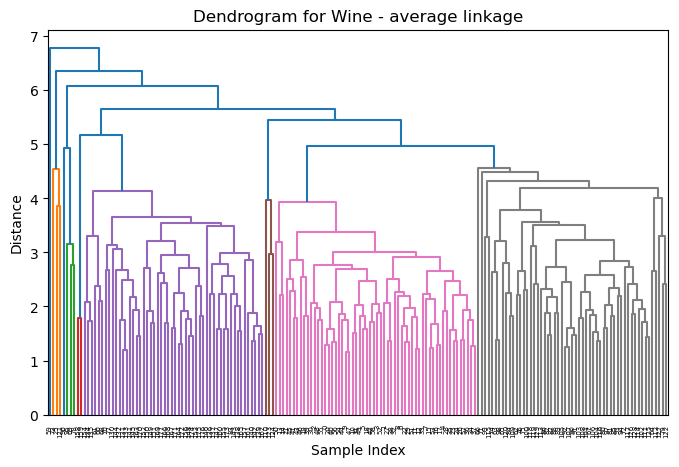

Number of clusters at distance 50000 for average linkage in Wine: 1
Analyzing ward linkage for Wine


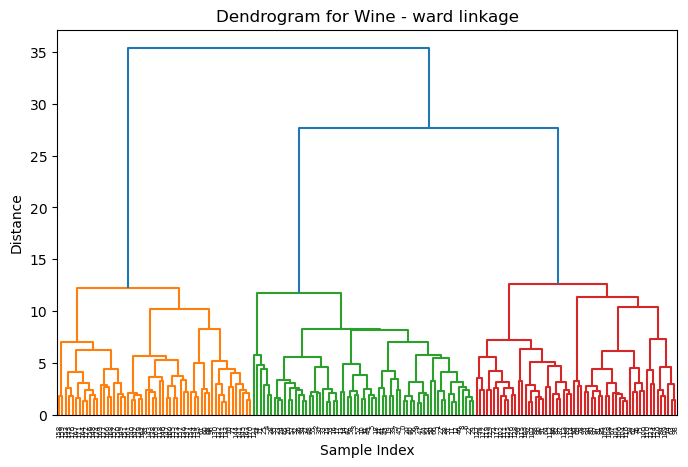

Number of clusters at distance 50000 for ward linkage in Wine: 1


In [64]:
# Wine dataset
analyze_clustering(X_wine, "Wine")


## 3.3 WHOLESALE

Analyzing single linkage for Wholesale


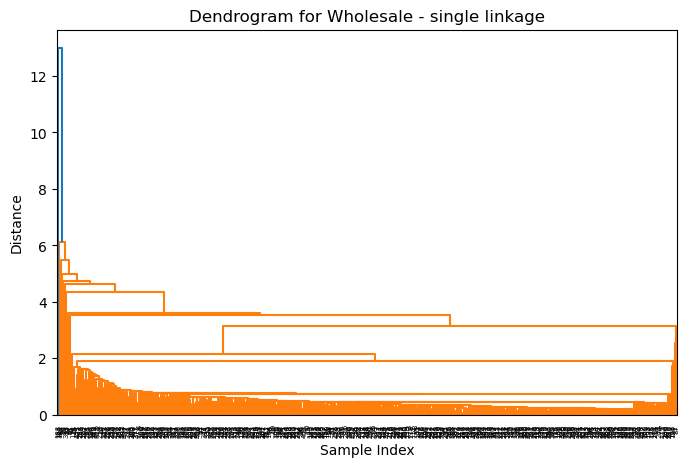

Number of clusters at distance 50000 for single linkage in Wholesale: 1
Analyzing complete linkage for Wholesale


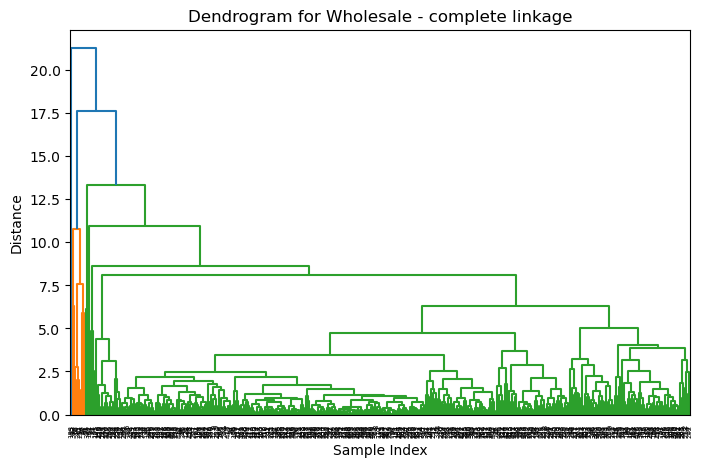

Number of clusters at distance 50000 for complete linkage in Wholesale: 1
Analyzing average linkage for Wholesale


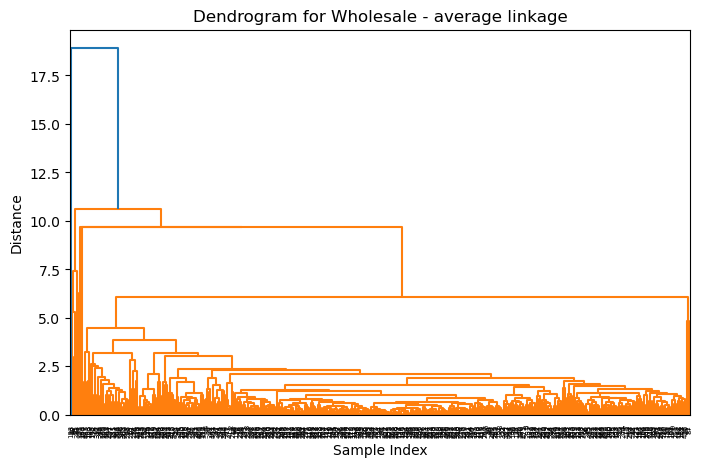

Number of clusters at distance 50000 for average linkage in Wholesale: 1
Analyzing ward linkage for Wholesale


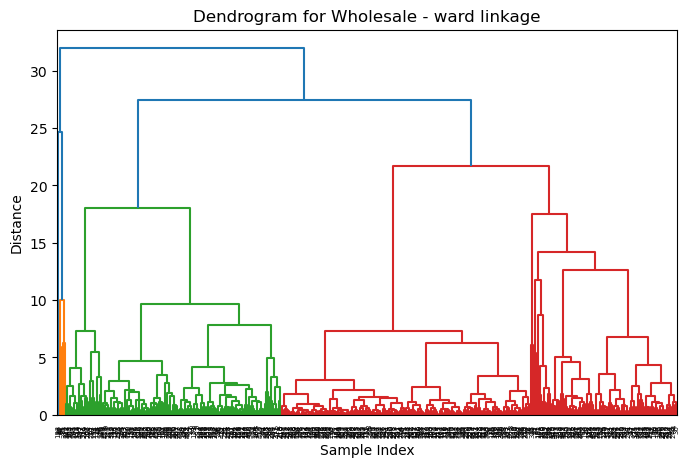

Number of clusters at distance 50000 for ward linkage in Wholesale: 1


In [65]:
# Wholesale dataset
analyze_clustering(X_wholesale, "Wholesale")

# PARTIE 4 : DBSCAN

### 4.1 IRIS

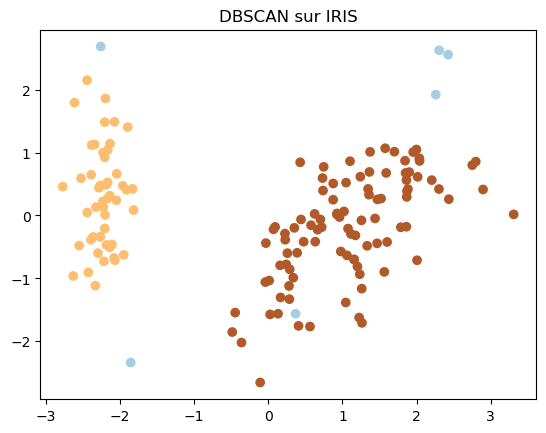

(6,)
Outliers dans IRIS : [ 15  41 106 109 117 131]


In [85]:

# Charger IRIS et le convertir en DataFrame pandas
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Création d'un scaler pour standardiser les données
scaler = StandardScaler()


# Standardisation des données IRIS
X_iris_scaled = scaler.fit_transform(df_iris)


# Fonction pour appliquer DBSCAN avec epsilon et min_samples donnés
def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)  # Obtenir les étiquettes de cluster
    return labels, dbscan


# Paramètres pour DBSCAN
eps_iris, min_samples_iris = 0.7, 5  # Paramètres pour IRIS

# Appliquer DBSCAN sur les données standardisées
labels_iris, dbscan_iris = apply_dbscan(X_iris_scaled, eps_iris, min_samples_iris)


# Fonction pour tracer les résultats de DBSCAN en utilisant PCA
def plot_dbscan_results(X, labels, title):
    pca = PCA(n_components=2)  # Réduction de dimension à 2D pour visualisation
    X_pca = pca.fit_transform(X)  # Transformation PCA
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Paired')  # Tracer les points colorés par cluster
    plt.title(title)
    plt.show()
    
    
# Visualisation des résultats pour IRIS
plot_dbscan_results(X_iris_scaled, labels_iris, "DBSCAN sur IRIS")



# Fonction pour identifier les outliers (étiquettes -1 sont des outliers)
def get_outliers(labels):
    return np.where(labels == -1)[0]  # Indices des points ayant une étiquette -1

# Identifier et afficher les outliers pour IRIS
outliers_iris = get_outliers(labels_iris)
print(outliers_iris.shape)
print(f"Outliers dans IRIS : {outliers_iris}")



### 4.2 WINE

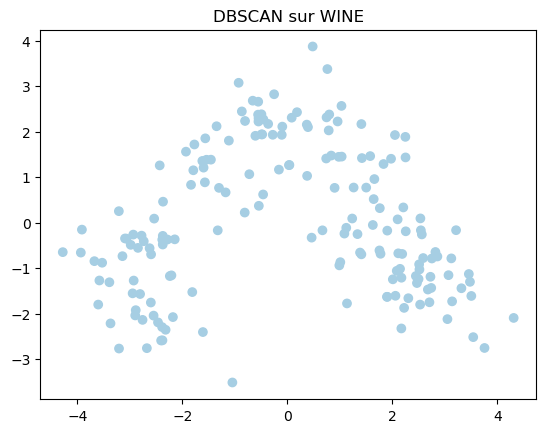

(178,)
Outliers dans WINE : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]


In [91]:

# Charger WINE et le convertir en DataFrame pandas
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

# Standardisation des données WINE
X_wine_scaled = scaler.fit_transform(df_wine)

# Paramètres pour DBSCAN WINE
eps_wine, min_samples_wine = 0.5, 10 # Paramètres pour WINE


# Appliquer DBSCAN sur les données standardisées
labels_wine, dbscan_wine = apply_dbscan(X_wine_scaled, eps_wine, min_samples_wine)

# Visualisation des résultats pour WINE 
plot_dbscan_results(X_wine_scaled, labels_wine, "DBSCAN sur WINE")

# Identifier et afficher les outliers pour chaque jeu de données
outliers_wine = get_outliers(labels_wine)
print(outliers_wine.shape)
print(f"Outliers dans WINE : {outliers_wine}")


### 4.3 WHOLESALES

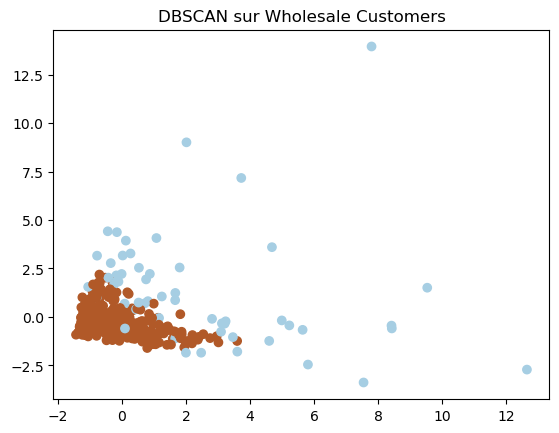

(54,)
Outliers dans Wholesale Customers : [  2  22  23  24  28  39  40  45  47  56  61  65  71  85  86  87  92  93
 103 109 125 141 145 171 176 181 183 196 202 211 216 218 251 253 254 258
 259 265 277 282 284 312 319 325 333 338 343 358 384 413 427 430 435 437]


In [92]:
# Standardisation des données Wholesale Customers (en retirant les deux premières colonnes 'Channel' et 'Region')
X_wholesale_scaled = scaler.fit_transform(wholesale.iloc[:, 2:])


# Paramètres pour DBSCAN 
eps_wholesale, min_samples_wholesale = 0.9, 5  # Paramètres pour Wholesale Customers

# Appliquer DBSCAN sur les données standardisées
labels_wholesale, dbscan_wholesale = apply_dbscan(X_wholesale_scaled, eps_wholesale, min_samples_wholesale)


# Visualisation des résultats pour IRIS, WINE et Wholesale Customers
plot_dbscan_results(X_wholesale_scaled, labels_wholesale, "DBSCAN sur Wholesale Customers")


# Identifier et afficher les outliers pour chaque jeu de données
outliers_wholesale = get_outliers(labels_wholesale)
print(outliers_wholesale.shape)
print(f"Outliers dans Wholesale Customers : {outliers_wholesale}")